In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression 

In [3]:
antapani = pd.read_csv('Clean Antapani.csv')
arcamanik = pd.read_csv('Clean Arcamanik.csv')
buahbatu = pd.read_csv('Clean Buahbatu.csv')

In [121]:
antapani.head()

,Kamar Tidur,Kamar Mandi,Luas Bangunan,Luas Tanah,Harga,Harga (Juta Rupiah)
0,4.0,3.0,131.0,108.0,2500000100,2500.0
1,4.0,3.0,131.0,108.0,2500000000,2500.0
2,3.0,3.0,130.0,108.0,2500000000,2500.0
3,6.0,3.0,85.0,108.0,890000000,890.0
4,3.0,2.0,106.0,96.0,1599900000,1599.9


In [122]:
arcamanik.head()

,Kamar Tidur,Kamar Mandi,Luas Bangunan,Luas Tanah,Harga,Harga (Juta Rupiah)
0,3.0,2.0,240.0,331.0,2500000000,2500.0
1,4.0,2.0,220.0,231.0,2500000000,2500.0
2,2.0,1.0,61.0,89.0,350000000,350.0
3,2.0,1.0,45.0,100.0,575000000,575.0
4,4.0,3.0,137.0,114.0,2400000000,2400.0


In [123]:
buahbatu.head()

,Kamar Tidur,Kamar Mandi,Luas Bangunan,Luas Tanah,Harga,Harga (Juta Rupiah)
0,4,3,168,264.0,4500000000,4500.0
1,2,1,29,82.0,810000000,810.0
2,10,3,146,70.0,2300000000,2300.0
3,2,2,50,72.0,693504000,693.5
4,2,2,50,72.0,693504000,693.5


In [124]:
antapani.describe()

,Kamar Tidur,Kamar Mandi,Luas Bangunan,Luas Tanah,Harga,Harga (Juta Rupiah)
count,973.000000,973.000000,973.000000,973.000000,9.730000e+02,973.000000
mean,3.476876,2.331963,127.924974,128.053443,1.424531e+09,1424.531490
std,1.387306,1.014187,73.323593,58.460894,7.119371e+08,711.937107
min,1.000000,1.000000,2.000000,37.000000,1.450000e+08,145.000000
25%,3.000000,2.000000,80.000000,90.000000,9.250000e+08,925.000000
50%,3.000000,2.000000,110.000000,109.000000,1.299000e+09,1299.000000
75%,4.000000,3.000000,170.000000,150.000000,1.750000e+09,1750.000000
max,14.000000,9.000000,1001.000000,400.000000,3.500000e+09,3500.000000


In [4]:
from sklearn.model_selection import train_test_split

antapani_train, antapani_test = train_test_split(antapani, test_size=0.2)
arcamanik_train, arcamanik_test = train_test_split(arcamanik, test_size=0.2)
buahbatu_train, buahbatu_test = train_test_split(buahbatu, test_size=0.2)

In [5]:
x = ['Kamar Tidur','Kamar Mandi', 'Luas Bangunan', 'Luas Tanah']
y = ['Harga (Juta Rupiah)']

antapani_y = antapani_train[y]
antapani_x = antapani_train[x]
arcamanik_y = arcamanik_train[y]
arcamanik_x = arcamanik_train[x]
buahbatu_y = buahbatu_train[y]
buahbatu_x = buahbatu_train[x]

In [6]:
lr_antapani = LinearRegression()
lr_arcamanik = LinearRegression()
lr_buahbatu = LinearRegression()

In [7]:
lr_antapani.fit(antapani_x, antapani_y)
lr_arcamanik.fit(arcamanik_x, arcamanik_y)
lr_buahbatu.fit(buahbatu_x, buahbatu_y)

LinearRegression()

In [39]:
df = pd.concat([pd.DataFrame(antapani_x.columns),
                 pd.DataFrame(np.transpose(lr_antapani.coef_)),
                 pd.DataFrame(np.transpose(lr_arcamanik.coef_)),
                 pd.DataFrame(np.transpose(lr_buahbatu.coef_))], axis = 1)

df.columns = ['Features', 'Antapani', 'Arcamanik', 'Buah Batu']
df

,Features,Antapani,Arcamanik,Buah Batu
0,Kamar Tidur,-1.295348,-24.980863,-17.922740
1,Kamar Mandi,161.242625,135.729368,105.800524
2,Luas Bangunan,2.145008,3.166898,2.213889
3,Luas Tanah,5.845985,3.995295,7.284526


In [46]:
# Transpose the DataFrame
df_transposed = df.transpose()

# Set the first row as the column names and remove the old 'Features' column
df_transposed.columns = df_transposed.iloc[0]
df_transposed = df_transposed.drop('Features')

# Reset the index if you want to turn the old column names into a regular column
df_transposed = df_transposed.reset_index().rename(columns={'index': 'Location'})
df_transposed


Features,Location,Kamar Tidur,Kamar Mandi,Luas Bangunan,Luas Tanah
0,Antapani,-1.295348,161.242625,2.145008,5.845985
1,Arcamanik,-24.980863,135.729368,3.166898,3.995295
2,Buah Batu,-17.92274,105.800524,2.213889,7.284526


In [64]:
score = [lr_antapani.score(antapani_x,antapani_y), lr_arcamanik.score(arcamanik_x,arcamanik_y), lr_buahbatu.score(buahbatu_x,buahbatu_y)]
location = ['Antapani', 'Arcamanik','Buah Batu']

# dictionary of lists 
dict = {'Location': location, 'R2': score} 
   
score_df = pd.DataFrame(dict)
   
score_df

,Location,R2
0,Antapani,0.610549
1,Arcamanik,0.675983
2,Buah Batu,0.562644


In [62]:
def adj_r2(x,y):
    model = LinearRegression()
    model.fit(x, y)
    r2 = model.score(x, y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [66]:
antapani_adj = adj_r2(antapani_x, antapani_y)
arcamanik_adj= adj_r2(arcamanik_x, arcamanik_y)
buahbatu_adj= adj_r2(buahbatu_x, buahbatu_y)
adjusted_r2 = [antapani_adj, arcamanik_adj, buahbatu_adj]
score_df['Adj. R2'] = adjusted_r2

In [67]:
score_df

,Location,R2,Adj. R2
0,Antapani,0.610549,0.608534
1,Arcamanik,0.675983,0.673071
2,Buah Batu,0.562644,0.558677


In [13]:
x_test = test[['Kamar Tidur','Kamar Mandi', 'Luas Bangunan', 'Luas Tanah']]

In [14]:
prediction = reg.predict(x_test)

In [15]:
test['Prediksi'] = prediction

In [16]:
test.head()

,Kamar Tidur,Kamar Mandi,Luas Bangunan,Luas Tanah,Harga,Harga (Juta Rupiah),Prediksi
477,3.0,2.0,90.0,101.0,1600000000,1600.0,1135.197707
583,4.0,3.0,100.0,140.0,895000000,895.0,1554.758198
862,5.0,2.0,100.0,163.0,1500000000,1500.0,1497.071733
854,4.0,1.0,86.0,96.0,850000000,850.0,908.494100
765,3.0,2.0,140.0,122.0,1900000000,1900.0,1341.983388


In [17]:
test['Diff'] = test['Harga (Juta Rupiah)']-test['Prediksi']
test['Diff %'] = ((test['Harga (Juta Rupiah)']-test['Prediksi'])/test['Harga (Juta Rupiah)'])*100
test.head()

,Kamar Tidur,Kamar Mandi,Luas Bangunan,Luas Tanah,Harga,Harga (Juta Rupiah),Prediksi,Diff,Diff %
477,3.0,2.0,90.0,101.0,1600000000,1600.0,1135.197707,464.802293,29.050143
583,4.0,3.0,100.0,140.0,895000000,895.0,1554.758198,-659.758198,-73.716000
862,5.0,2.0,100.0,163.0,1500000000,1500.0,1497.071733,2.928267,0.195218
854,4.0,1.0,86.0,96.0,850000000,850.0,908.494100,-58.494100,-6.881659
765,3.0,2.0,140.0,122.0,1900000000,1900.0,1341.983388,558.016612,29.369295


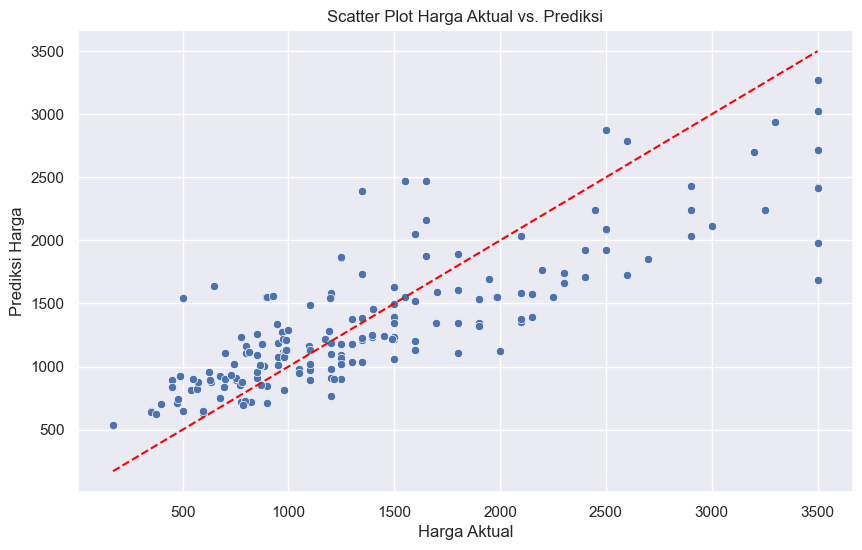

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Harga (Juta Rupiah)', y='Prediksi', data=test)
plt.plot([test['Harga (Juta Rupiah)'].min(), test['Harga (Juta Rupiah)'].max()],
         [test['Harga (Juta Rupiah)'].min(), test['Harga (Juta Rupiah)'].max()],
         linestyle='--', color='red')  # Garis referensi
plt.xlabel('Harga Aktual')
plt.ylabel('Prediksi Harga')
plt.title('Scatter Plot Harga Aktual vs. Prediksi')
plt.show()

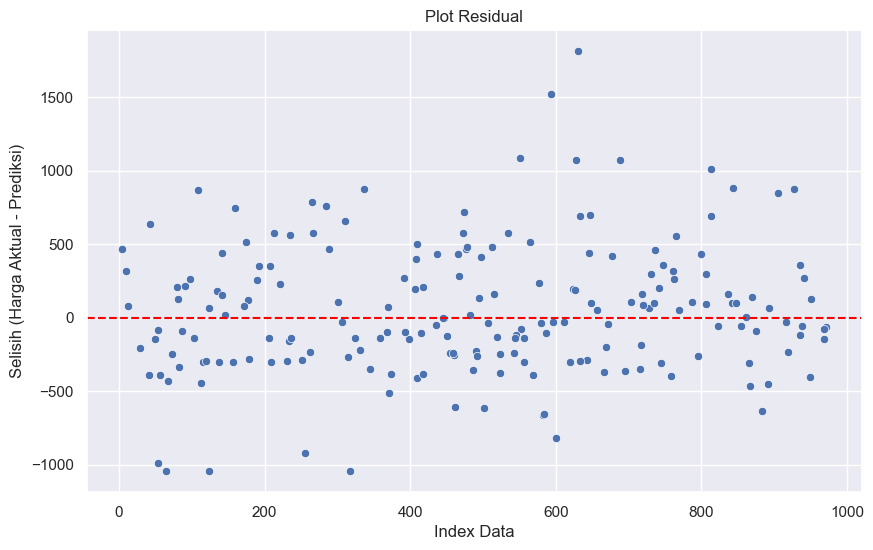

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=test.index, y='Diff', data=test)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Index Data')
plt.ylabel('Selisih (Harga Aktual - Prediksi)')
plt.title('Plot Residual')
plt.show()

In [20]:
print("Statistik Deskriptif Selisih:")
print(test['Diff'].describe())

print("\nRata-Rata Selisih:")
print(test['Diff'].mean())

print("\nStandar Deviasi Selisih:")
print(test['Diff'].std())


Statistik Deskriptif Selisih:
count     195.000000
mean       52.147951
std       448.260838
min     -1045.075622
25%      -251.069881
50%        -1.637996
75%       303.680802
max      1811.504823
Name: Diff, dtype: float64

Rata-Rata Selisih:
52.14795064024302

Standar Deviasi Selisih:
448.26083798408206
